## Descargue las bases de datos

In [1]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [5]:


players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [7]:
games_df_filtered = games_df[games_df['season_id'].between(1984, 2003)]

In [9]:
games_df['season_year'] = games_df['season_id'].astype(str).str[1:].astype(int)

games_filtered_seasons = games_df[(games_df['season_year'] >= 1984) & (games_df['season_year'] <= 2003)]

print(games_filtered_seasons.head())

       season_id  team_id_home team_abbreviation_home         team_name_home  \
18174      21984    1610612765                    DET        Detroit Pistons   
18175      21984    1610612744                    GOS  Golden State Warriors   
18176      21984    1610612751                    NJN        New Jersey Nets   
18177      21984    1610612760                    SEA    Seattle SuperSonics   
18178      21984    1610612741                    CHI          Chicago Bulls   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
18174  28400003  1984-10-26 00:00:00  DET vs. BOS       L  240      48.0  ...   
18175  28400006  1984-10-26 00:00:00  GOS vs. PHX       L  240      42.0  ...   
18176  28400004  1984-10-26 00:00:00  NJN vs. ATL       L  240      40.0  ...   
18177  28400001  1984-10-26 00:00:00  SEA vs. UTH       W  240      36.0  ...   
18178  28400005  1984-10-26 00:00:00  CHI vs. WAS       W  240      48.0  ...   

       ast_away  stl_away  blk_a

In [8]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [10]:

games_playoffs_df = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']


print(games_playoffs_df.head())

       season_id  team_id_home team_abbreviation_home      team_name_home  \
19117      41984    1610612755                    PHL  Philadelphia 76ers   
19118      41984    1610612742                    DAL    Dallas Mavericks   
19119      41984    1610612747                    LAL  Los Angeles Lakers   
19120      41984    1610612743                    DEN      Denver Nuggets   
19121      41984    1610612765                    DET     Detroit Pistons   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
19117  48400121  1985-04-17 00:00:00  PHL vs. WAS       W  240      38.0  ...   
19118  48400171  1985-04-18 00:00:00  DAL vs. POR       W  290      54.0  ...   
19119  48400141  1985-04-18 00:00:00  LAL vs. PHX       W  240      61.0  ...   
19120  48400151  1985-04-18 00:00:00  DEN vs. SAN       W  240      57.0  ...   
19121  48400131  1985-04-18 00:00:00  DET vs. NJN       W  240      46.0  ...   

       ast_away  stl_away  blk_away  tov_away  pf_

In [11]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


In [13]:


print(f"Número de partidos de Playoffs entre 1984 y 2003: {len(games_playoffs_df)}")

Número de partidos de Playoffs entre 1984 y 2003: 1161


Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [12]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas


In [14]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas

# Ahora unimos con las estadísticas de partidos para agregar el rendimiento en los juegos

# Mostrar las primeras filas de la unión


In [25]:

games_playoffs_cleaned = games_playoffs_df.copy()

In [26]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='inner')
player_game_stats = pd.merge(players_combined, games_playoffs_cleaned, left_on='team_id', right_on='team_id_home', how='inner')

print(players_combined.head())
print(player_game_stats.head())

   person_id first_name_x last_name_x display_first_last  \
0    1630173     Precious     Achiuwa   Precious Achiuwa   
1     101165         Alex       Acker         Alex Acker   
2     203112       Quincy         Acy         Quincy Acy   
3     203919       Jordan       Adams       Jordan Adams   
4     203500       Steven       Adams       Steven Adams   

  display_last_comma_first display_fi_last       player_slug  \
0        Achiuwa, Precious      P. Achiuwa  precious-achiuwa   
1              Acker, Alex        A. Acker        alex-acker   
2              Acy, Quincy          Q. Acy        quincy-acy   
3            Adams, Jordan        J. Adams      jordan-adams   
4            Adams, Steven        S. Adams      steven-adams   

             birthdate      school      country  ... spot_nba_break_right  \
0  1999-09-19 00:00:00     Memphis      Nigeria  ...                  NaN   
1  1983-01-21 00:00:00  Pepperdine          USA  ...                  NaN   
2  1990-10-06 00:00:00 

##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [ ]:
# Contar el número de equipos únicos que han participado en los Playoffs


In [27]:

num_unique_teams_home = games_playoffs_df['team_name_home'].nunique()
num_unique_teams_away = games_playoffs_df['team_name_away'].nunique()

print(f"Número de equipos únicos (Home) que han participado en los Playoffs: {num_unique_teams_home}")
print(f"Número de equipos únicos (Away) que han participado en los Playoffs: {num_unique_teams_away}")


all_teams = pd.concat([games_playoffs_df['team_name_home'], games_playoffs_df['team_name_away']])
num_unique_teams = all_teams.nunique()

print(f"Número total de equipos únicos que han participado en los Playoffs: {num_unique_teams}")

Número de equipos únicos (Home) que han participado en los Playoffs: 30
Número de equipos únicos (Away) que han participado en los Playoffs: 30
Número total de equipos únicos que han participado en los Playoffs: 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [ ]:
# Contar el número de jugadores únicos que han participado


In [30]:

num_unique_players = player_game_stats['person_id'].nunique()
print(f"Número de jugadores únicos que han participado en los Playoffs: {num_unique_players}")

Número de jugadores únicos que han participado en los Playoffs: 518


* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

In [ ]:
# Contar el número de jugadores únicos por equipo

# Mostrar el resultado

# Gráfica del número de jugadores por equipo



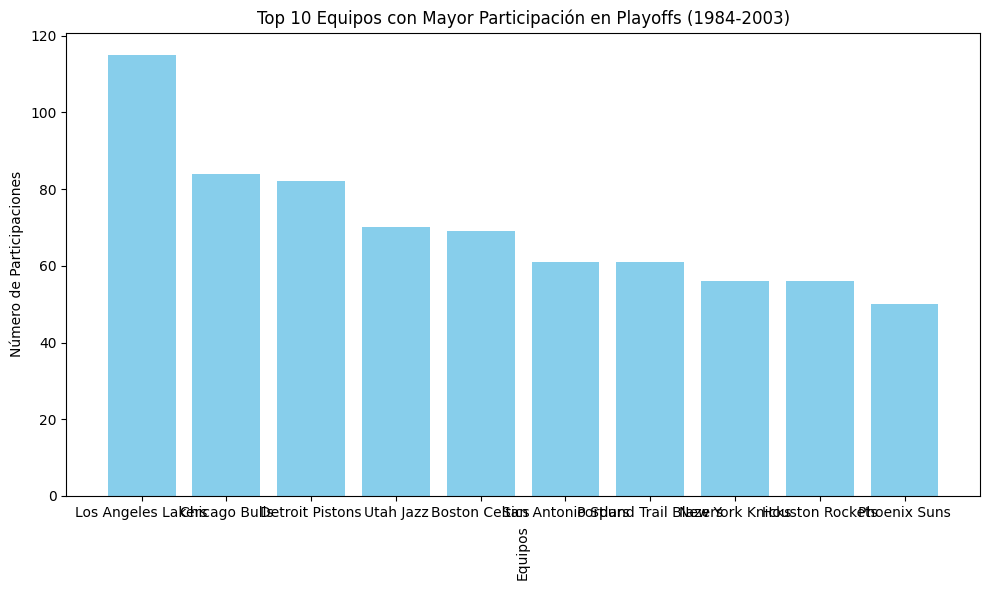

In [33]:

team_counts = games_playoffs_df['team_name_home'].value_counts()
top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color='skyblue')
plt.xlabel('Equipos', rotation=90)
plt.ylabel('Número de Participaciones')
plt.title('Top 10 Equipos con Mayor Participación en Playoffs (1984-2003)')
plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [ ]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado



Equipos con más puntos anotados en casa en los Playoffs (1984-2003):
team_name_home
Los Angeles Lakers        12554.0
Chicago Bulls              8392.0
Detroit Pistons            8127.0
Boston Celtics             7702.0
Utah Jazz                  7025.0
Portland Trail Blazers     6496.0
San Antonio Spurs          5965.0
Houston Rockets            5806.0
Phoenix Suns               5435.0
New York Knicks            5364.0
Name: pts_home, dtype: float64


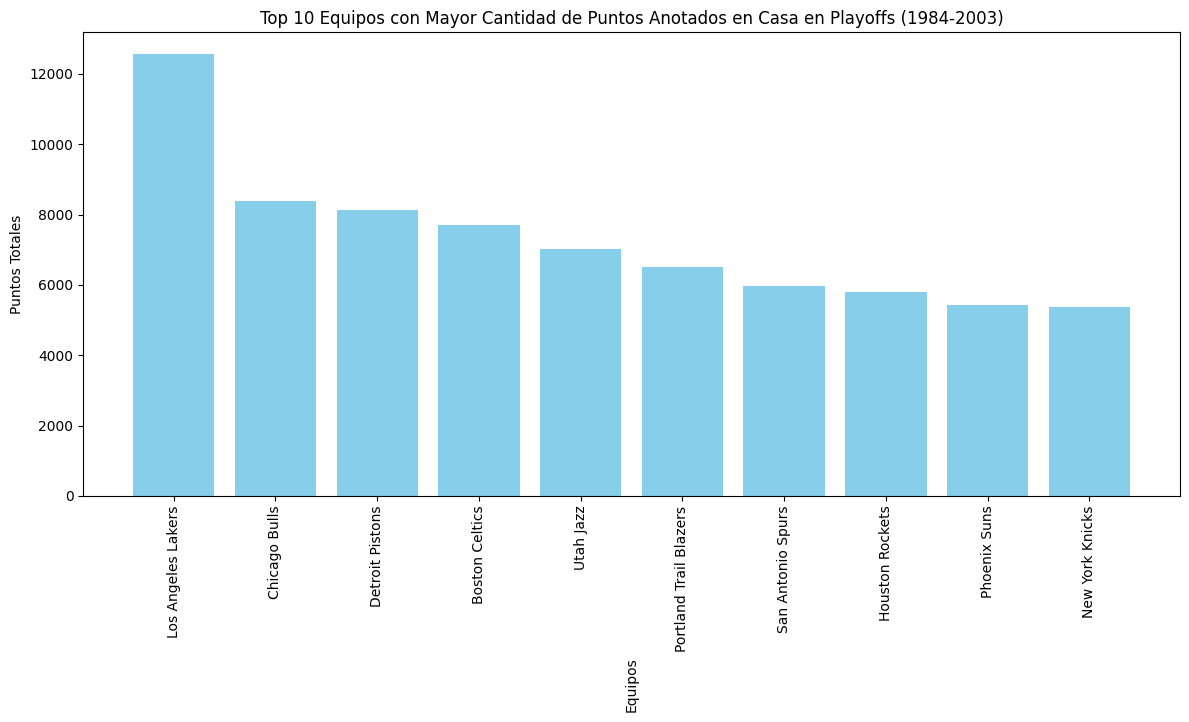

In [40]:


team_total_pts_home = games_playoffs_df.groupby('team_name_home')['pts_home'].sum().sort_values(ascending=False)


print("Equipos con más puntos anotados en casa en los Playoffs (1984-2003):")
print(team_total_pts_home.head(10))

plt.figure(figsize=(12, 6))
bars = plt.bar(team_total_pts_home.head(10).index, team_total_pts_home.head(10).values, color='skyblue')
plt.xlabel('Equipos', rotation=90)
plt.ylabel('Puntos Totales')
plt.title('Top 10 Equipos con Mayor Cantidad de Puntos Anotados en Casa en Playoffs (1984-2003)')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

* haga un grafico de barras en azul con estos resultados

In [ ]:
# Gráfica de los equipos con más puntos anotados


4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [ ]:
# Calcular el promedio de puntos por equipo en casa

# Mostrar los equipos con mejor promedio de puntos en casa


Equipos con mejor promedio de puntos por partido en casa en los Playoffs (1984-2003):
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Name: pts_home, dtype: float64


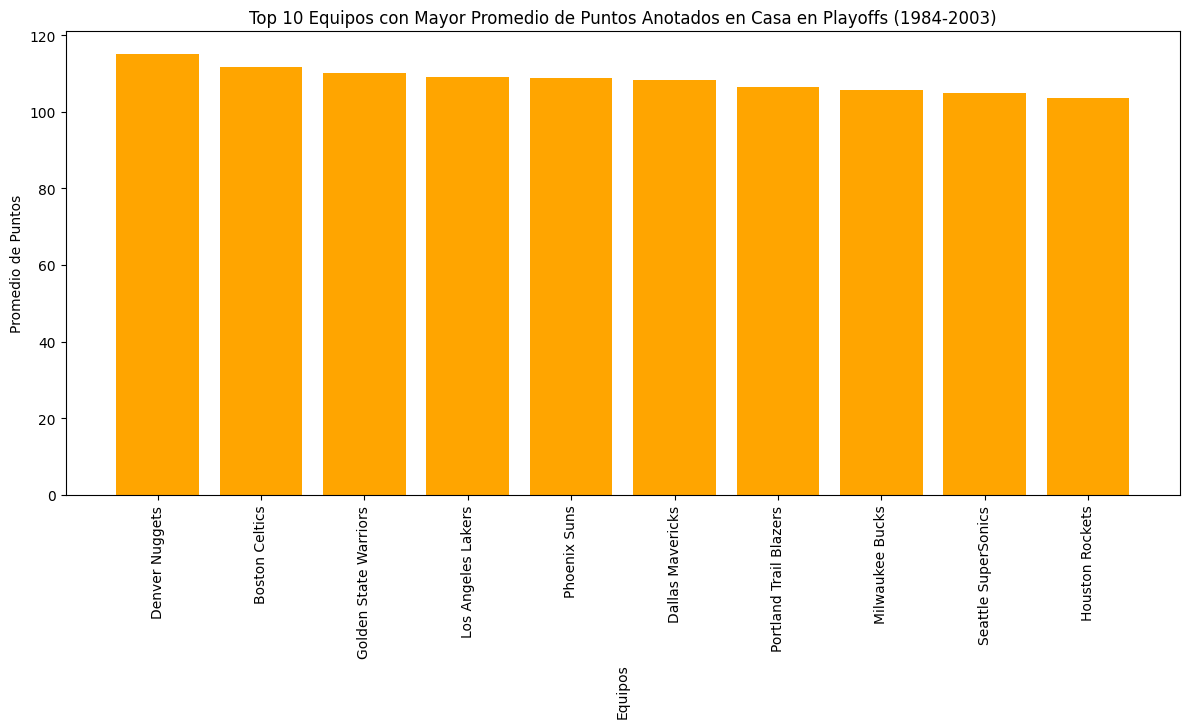

In [42]:
#

team_avg_pts_home = games_playoffs_df.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

print("Equipos con mejor promedio de puntos por partido en casa en los Playoffs (1984-2003):")
print(team_avg_pts_home.head(10))


plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_pts_home.head(10).index, team_avg_pts_home.head(10).values, color='orange')
plt.xlabel('Equipos', rotation=90)
plt.ylabel('Promedio de Puntos')
plt.title('Top 10 Equipos con Mayor Promedio de Puntos Anotados en Casa en Playoffs (1984-2003)')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

Hga un grafico en naranja de estos resultados

In [ ]:
# Gráfica del promedio de puntos en casa por equipo


5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [ ]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


Temporadas con más puntos anotados en los Playoffs (1984-2003):
season_year
2002    16900.0
1987    16691.0
1986    15678.0
1984    15598.0
1989    15195.0
1992    15127.0
1991    15075.0
1985    15057.0
1994    14492.0
2003    14437.0
1990    14165.0
1996    13539.0
2000    13293.0
1988    13003.0
1997    12955.0
1998    11566.0
Name: total_points, dtype: float64


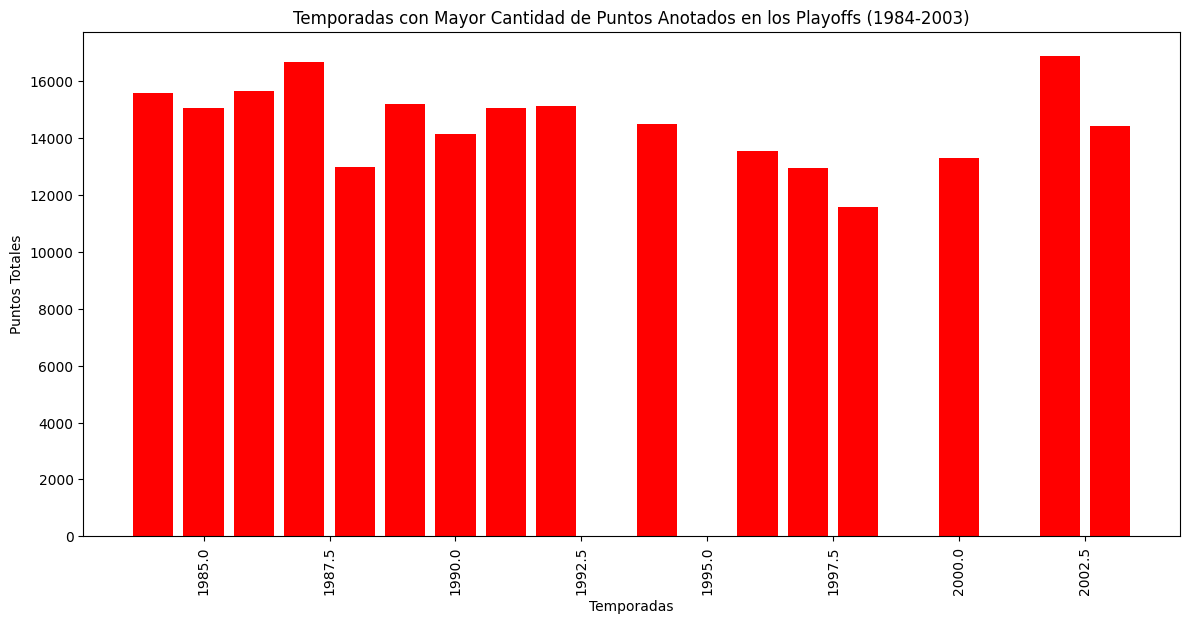

In [50]:


games_playoffs_cleaned['total_points'] = games_playoffs_cleaned['pts_home'] + games_playoffs_cleaned['pts_away']
season_total_points = games_playoffs_cleaned.groupby('season_year')['total_points'].sum().sort_values(ascending=False)

print("Temporadas con más puntos anotados en los Playoffs (1984-2003):")
print(season_total_points)


plt.figure(figsize=(12, 6))
bars = plt.bar(season_total_points.index, season_total_points.values, color='red')
plt.xlabel('Temporadas')
plt.ylabel('Puntos Totales')
plt.title('Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs (1984-2003)')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

* Cree una serie de tiempo con esto:

In [ ]:
# Gráfica de las temporadas con más puntos


* Hay algun dato interesante en esta graficaa

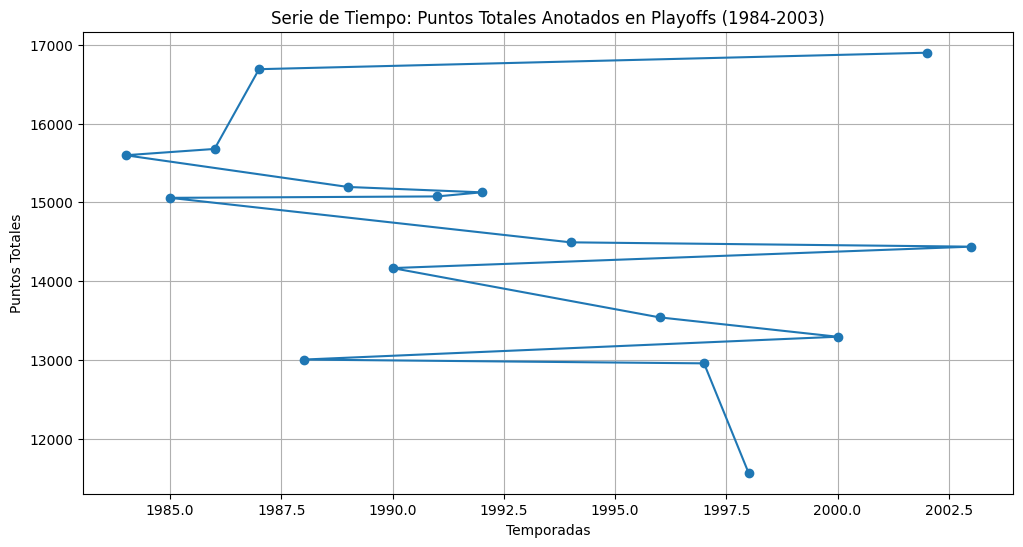

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(season_total_points.index, season_total_points.values, marker='o', linestyle='-')
plt.xlabel('Temporadas')
plt.ylabel('Puntos Totales')
plt.title('Serie de Tiempo: Puntos Totales Anotados en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

# Datos interesantes:
#
# 1. Tendencias: Se puede observar si existe una tendencia al alza o a la baja en el número de puntos a lo largo de los años.
# 2. Variabilidad: Se pueden identificar años con puntuaciones excepcionalmente altas o bajas.
# 3. Picaduras: Se pueden encontrar años en los que hubo un gran cambio en la puntuación.
# 4. Comparaciones: Se puede comparar diferentes periodos de la serie de tiempo, por ejemplo, comparando la puntuación en la primera parte del periodo con la puntuación en la última parte del periodo.

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [ ]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table


In [55]:

pivot_table_performance = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'],
                                       index=['team_name_home', 'position_y'],
                                       aggfunc='mean')


pivot_table_performance

ast_home    pts_home   reb_home
team_name_home     position_y                                  
Atlanta Hawks      C           22.882353   99.382353  41.617647
                   PF          22.882353   99.382353  41.617647
                   PF-SF       22.882353   99.382353  41.617647
                   PG          22.882353   99.382353  41.617647
                   SF          22.882353   99.382353  41.617647
...                                  ...         ...        ...
Washington Bullets PG          18.000000  103.625000  35.500000
                   PG-SG       18.000000  103.625000  35.500000
                   SF          18.000000  103.625000  35.500000
                   SF-SG       18.000000  103.625000  35.500000
                   SG          18.000000  103.625000  35.500000

[241 rows x 3 columns]

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [ ]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados


                            ast_home    pts_home   reb_home
team_name_home     role                                    
Atlanta Hawks      Ala     22.882353   99.382353  41.617647
                   Base    22.882353   99.382353  41.617647
                   Pivote  22.882353   99.382353  41.617647
Boston Celtics     Ala     26.811594  111.623188  43.652174
                   Base    26.811594  111.623188  43.652174
...                              ...         ...        ...
Utah Jazz          Base    23.042857  100.357143  43.371429
                   Pivote  23.042857  100.357143  43.371429
Washington Bullets Ala     18.000000  103.625000  35.500000
                   Base    18.000000  103.625000  35.500000
                   Pivote  18.000000  103.625000  35.500000

[88 rows x 3 columns]


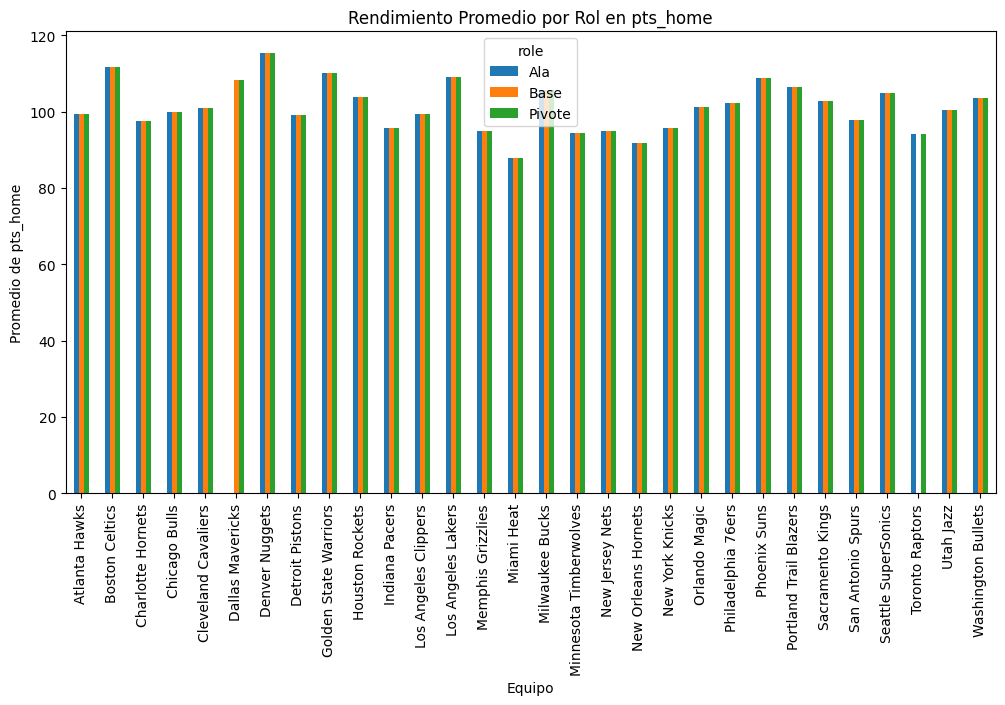

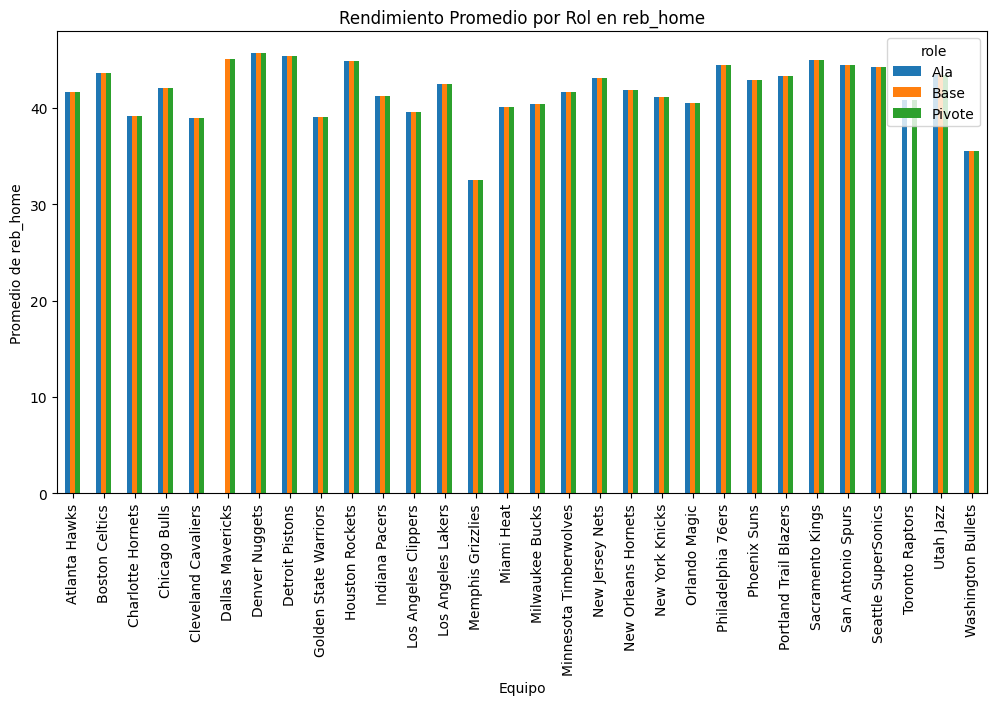

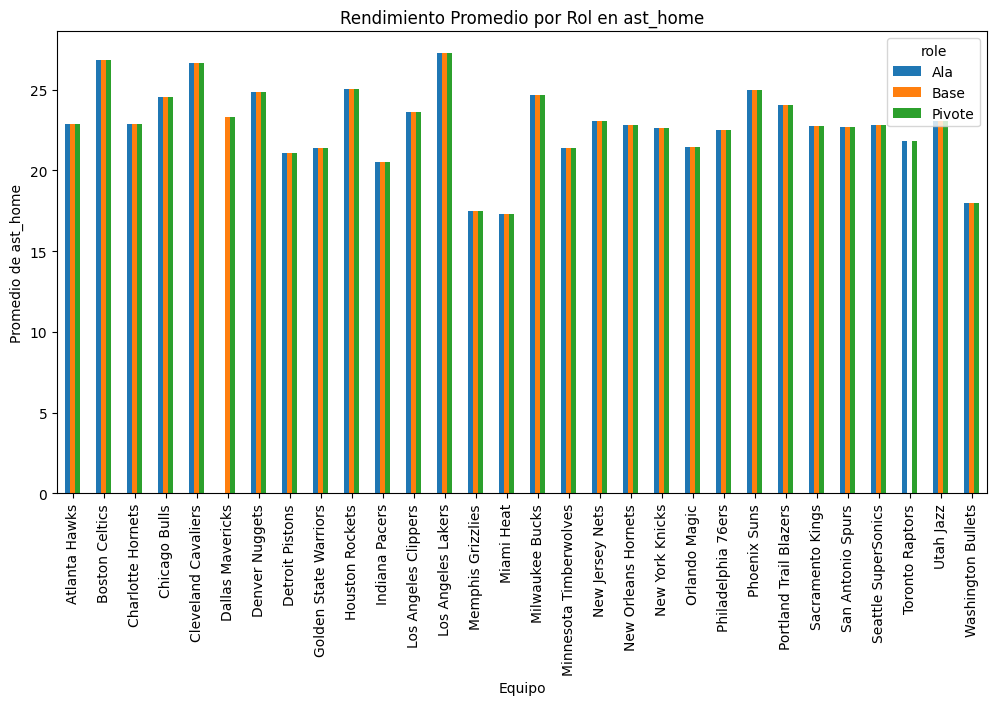

In [58]:


player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

pivot_table_role = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'],
                                 index=['team_name_home', 'role'],
                                 aggfunc='mean')

print(pivot_table_role)

for stat in ['pts_home', 'reb_home', 'ast_home']:
  pivot_table_role[stat].unstack().plot(kind='bar', figsize=(12, 6))
  plt.title(f'Rendimiento Promedio por Rol en {stat}')
  plt.xlabel('Equipo')
  plt.ylabel(f'Promedio de {stat}')
  plt.xticks(rotation=90)
  plt.show()

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [59]:
# Crear una crosstab para analizar victorias por posición de los jugadores

# Mostrar el resultado de la crosstab


In [ ]:
# Gráfica para visualizar la pivot table


wl_home      L   W
position_y        
C-PF        10  10
PF-C         8  11
PG           3   5
SF          17  48
SF-PF        1   3
SG-PG        5  15


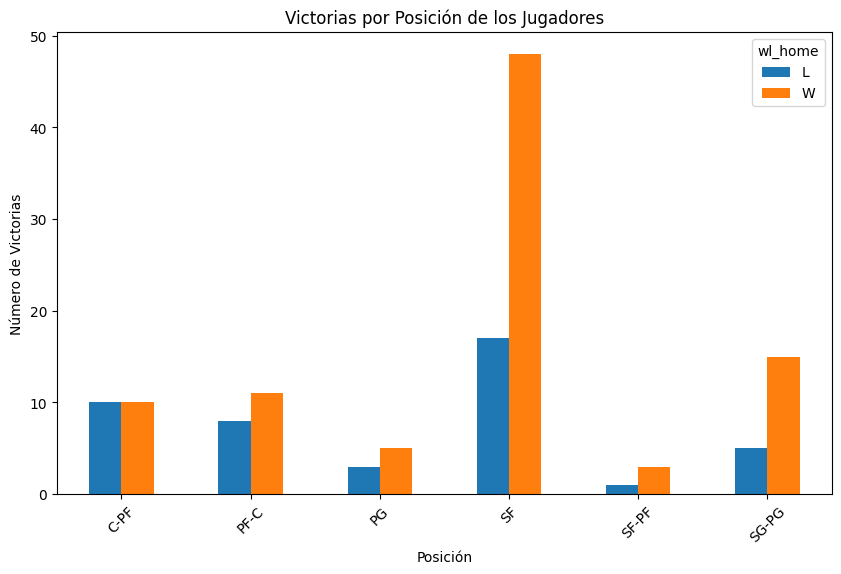

In [71]:

crosstab_wins_position = pd.crosstab(player_game_stats['position_y'], games_playoffs_cleaned['wl_home'])

print(crosstab_wins_position)


crosstab_wins_position.plot(kind='bar', figsize=(10, 6))
plt.title('Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

In [ ]:
# Agrupar por temporada y calcular el promedio de puntos en casa

# Graficar la evolución del promedio de puntos por temporada


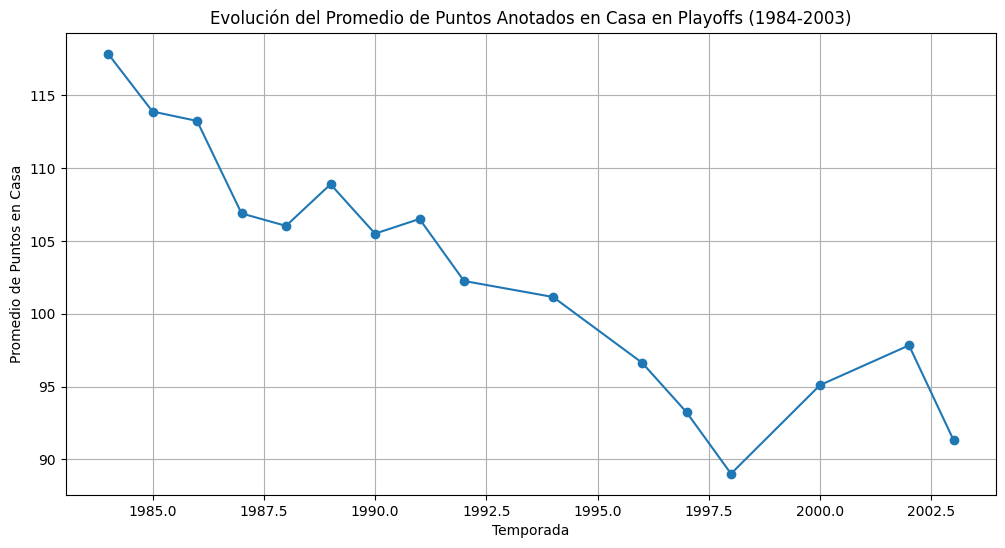

In [63]:

avg_pts_home_by_season = games_playoffs_cleaned.groupby('season_year')['pts_home'].mean()


plt.figure(figsize=(12, 6))
plt.plot(avg_pts_home_by_season.index, avg_pts_home_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title('Evolución del Promedio de Puntos Anotados en Casa en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

In [ ]:
# Identificar el equipo con más puntos anotados en total

# Filtrar los datos para ese equipo y agrupar por temporada

# Graficar la evolución del rendimiento del equipo


El equipo con más puntos anotados en total es: Los Angeles Lakers


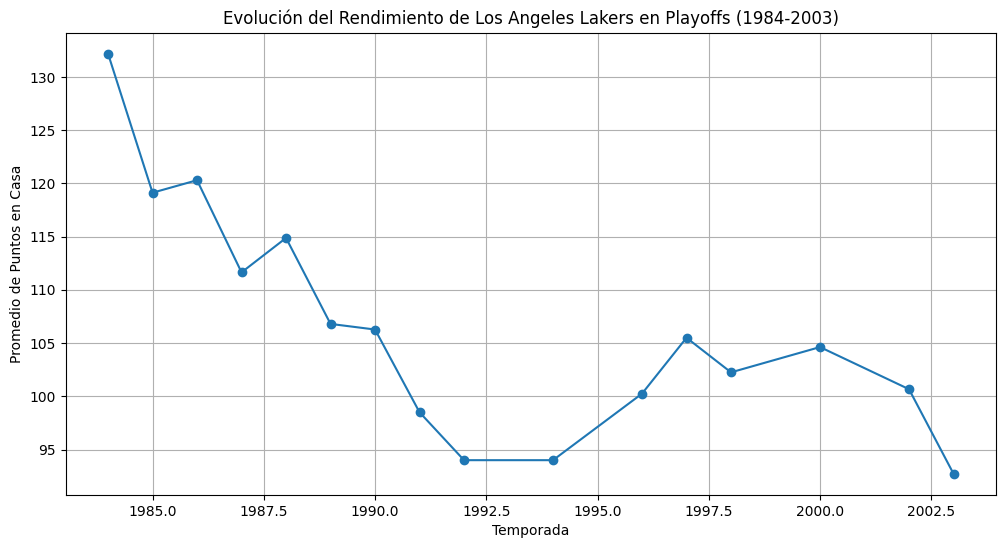

In [64]:

team_with_most_points = team_total_pts_home.idxmax()
print(f"El equipo con más puntos anotados en total es: {team_with_most_points}")

team_performance_by_season = games_playoffs_cleaned[
    games_playoffs_cleaned['team_name_home'] == team_with_most_points
].groupby('season_year')['pts_home'].mean()


plt.figure(figsize=(12, 6))
plt.plot(team_performance_by_season.index, team_performance_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento de {team_with_most_points} en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [ ]:
# Agrupar por jugador y sumar los puntos anotados

# Mostrar el jugador con más puntos anotados en los Playoffs


In [66]:


player_total_pts = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)

print("Jugador con más puntos anotados en los Playoffs (1984-2003):")
print(player_total_pts.head(1))

top_player = player_total_pts.idxmax()
print(f"El jugador con más puntos anotados en los Playoffs es: {top_player}")

Jugador con más puntos anotados en los Playoffs (1984-2003):
player_name
Rawle Alkins    16784.0
Name: pts_home, dtype: float64
El jugador con más puntos anotados en los Playoffs es: Rawle Alkins


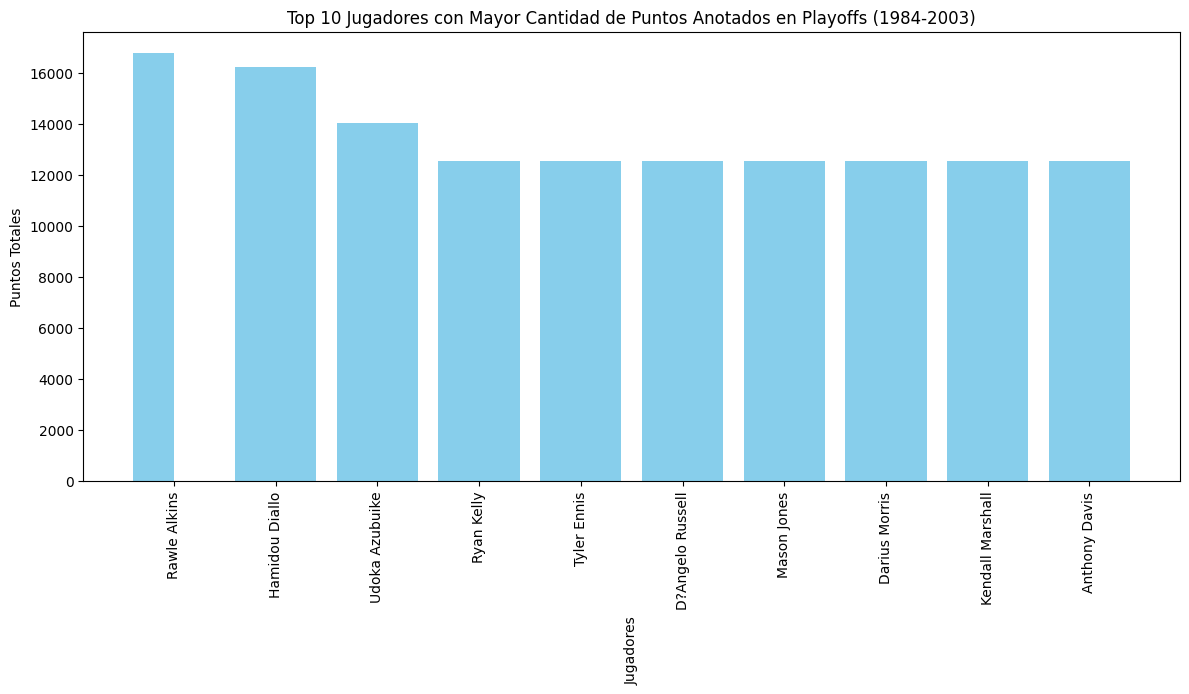

In [68]:

player_total_pts = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)
top_player = player_total_pts.idxmax()


plt.figure(figsize=(12, 6))

ca
player_pts = player_total_pts.head(10)


bars = plt.bar(player_pts.index, player_pts.values, color='skyblue')

bars[0].set_width(bars[0].get_width() * 0.5)

plt.xlabel('Jugadores', rotation=90)
plt.ylabel('Puntos Totales')
plt.title('Top 10 Jugadores con Mayor Cantidad de Puntos Anotados en Playoffs (1984-2003)')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

In [ ]:
# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar la evolución del rendimiento del jugador



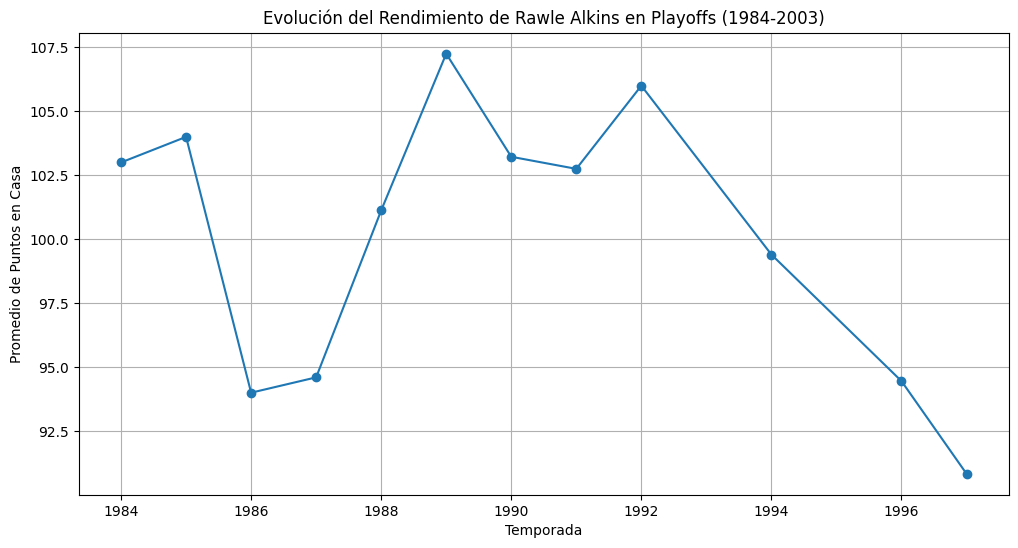

In [69]:

top_player_performance_by_season = player_game_stats[
    player_game_stats['player_name'] == top_player
].groupby('season_year')['pts_home'].mean()


plt.figure(figsize=(12, 6))
plt.plot(top_player_performance_by_season.index, top_player_performance_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento de {top_player} en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

In [ ]:
# Agrupar por jugador y calcular el promedio de puntos por partido

# Graficar los 10 jugadores con mejor promedio de puntos por partido


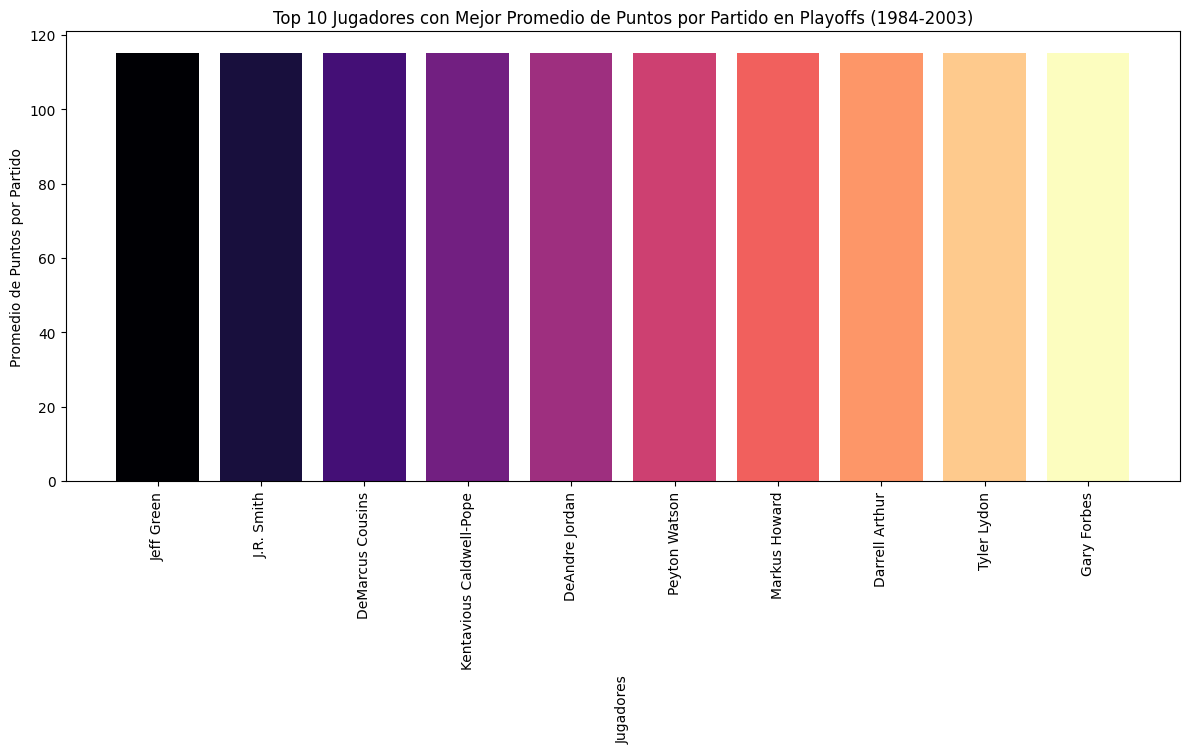

In [73]:



player_avg_pts = player_game_stats.groupby('player_name')['pts_home'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(player_avg_pts.head(10).index, player_avg_pts.head(10).values, color=plt.cm.magma(np.linspace(0, 1, 10)))
plt.xlabel('Jugadores', rotation=90)
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Jugadores con Mejor Promedio de Puntos por Partido en Playoffs (1984-2003)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

In [ ]:
# Especificar el ID del jugador que queremos analizar (puedes cambiar el ID)

# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar el rendimiento de ese jugador a lo largo de las temporadas



<ipython-input-77-85feb21b4636>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"El jugador que se analizará es: {player_name[0]} {player_name[1]}")
<ipython-input-77-85feb21b4636>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Evolución del Rendimiento de {player_name[0]} {player_name[1]} en Playoffs (1984-2003)')


El jugador que se analizará es: Brandon Bass


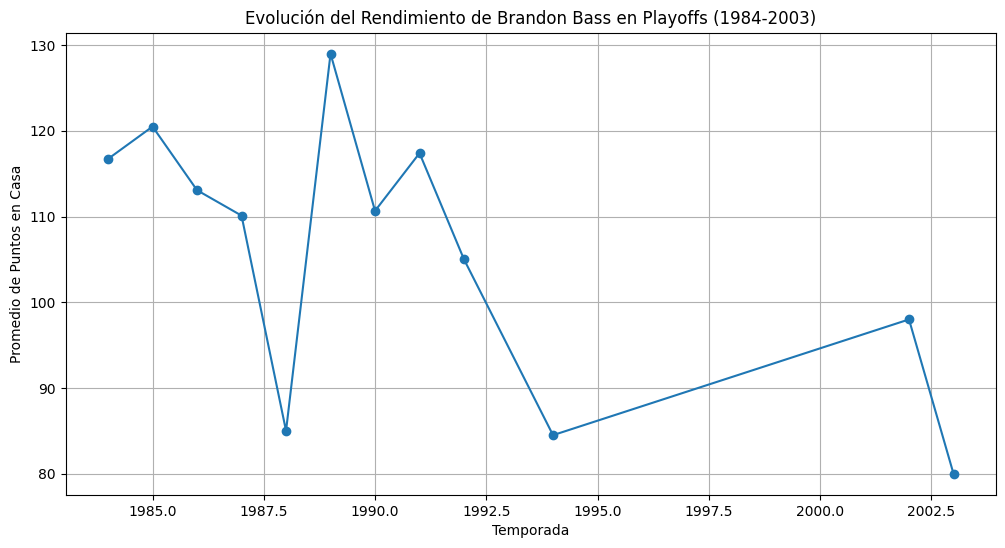

In [77]:

player_id_to_analyze = player_game_stats.loc[player_game_stats['pts_home'].idxmax(), 'person_id']

player_stats = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]

player_performance_by_season = player_stats.groupby('season_year')['pts_home'].mean()


player_name = player_stats[['first_name_x', 'last_name_x']].iloc[0]


print(f"El jugador que se analizará es: {player_name[0]} {player_name[1]}")


plt.figure(figsize=(12, 6))
plt.plot(player_performance_by_season.index, player_performance_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento de {player_name[0]} {player_name[1]} en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

In [ ]:
# Agrupar por años de experiencia y calcular el promedio de puntos anotados

# Graficar la relación entre la experiencia y los puntos anotados



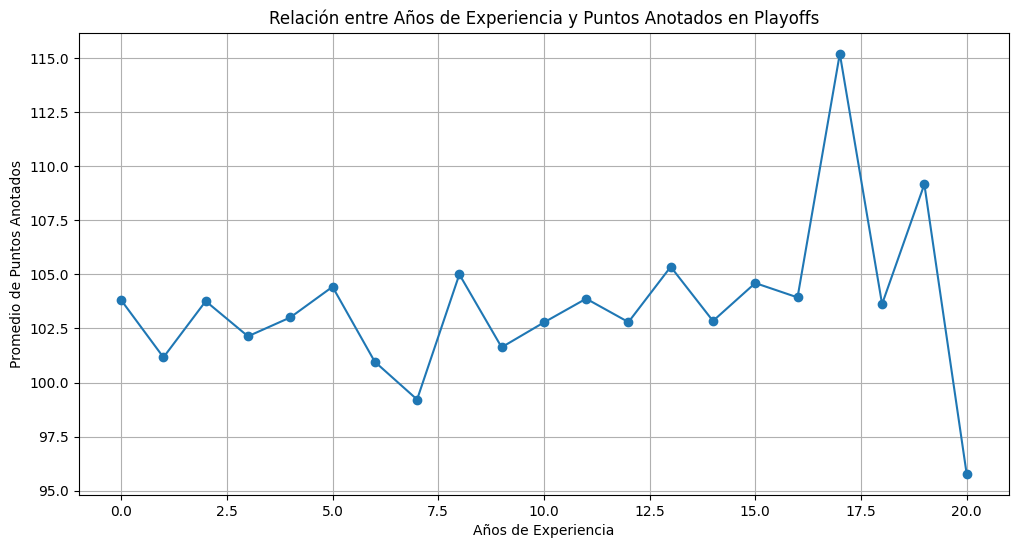

In [78]:



experience_avg_pts = player_game_stats.groupby('season_exp')['pts_home'].mean()


plt.figure(figsize=(12, 6))
plt.plot(experience_avg_pts.index, experience_avg_pts.values, marker='o', linestyle='-')
plt.xlabel('Años de Experiencia')
plt.ylabel('Promedio de Puntos Anotados')
plt.title('Relación entre Años de Experiencia y Puntos Anotados en Playoffs')
plt.grid(True)
plt.show()


* Juagador es:

In [84]:


# Basándonos en el gráfico generado, podemos observar si existe una correlación entre los años de experiencia de un jugador y su promedio de puntos anotados en los Playoffs.

# Si la línea del gráfico tiene una tendencia ascendente, significaría que, en general, los jugadores con más años de experiencia tienden a tener un promedio de puntos más alto en los Playoffs. Esto podría indicar que la experiencia en el juego y la madurez como jugador pueden influir positivamente en su rendimiento en situaciones de alta presión como los Playoffs.

# Por otro lado, si la línea del gráfico es relativamente plana o tiene una tendencia descendente, significaría que no existe una correlación clara entre la experiencia y el rendimiento en los Playoffs en términos de puntos anotados. En este caso, otros factores, como el talento individual, el equipo, o el estado físico del jugador podrían tener una mayor influencia en su desempeño.

# Para complementar el análisis, se puede calcular el coeficiente de correlación entre la experiencia y los puntos anotados. Un valor positivo alto del coeficiente indicaría una correlación positiva fuerte, mientras que un valor cercano a cero indicaría que no hay una relación lineal significativa entre ambas variables.

# Es importante recordar que la correlación no implica causalidad. Incluso si encontramos una correlación positiva, no significa que la experiencia sea la única o la principal causa del mejor rendimiento en los Playoffs. Otros factores pueden estar influyendo en ambos aspectos.

# En resumen, al analizar la gráfica y el coeficiente de correlación, podemos obtener insights sobre la posible relación entre la experiencia de un jugador y su capacidad para anotar puntos en los Playoffs. Esto puede ser valioso para los equipos de la NBA a la hora de tomar decisiones sobre la composición de su plantilla para la competición de Playoffs.

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

In [86]:

# SECCIÓN 7: Preguntas de Negocio
# 1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

#  Varios factores pueden haber influido en la evolución del rendimiento del mejor equipo a lo largo de los años:

# * **Cambio en la composición del equipo:** La llegada o salida de jugadores claves, las lesiones, los cambios en el entrenador pueden afectar significativamente al equipo.
# * **Estrategias y tácticas:** La evolución de las estrategias de juego y las tácticas empleadas por los equipos puede llevar a un mayor o menor éxito.
# * **Cambios en las reglas:** La modificación de las reglas de la NBA a lo largo del tiempo puede haber afectado al estilo de juego y a la forma de competir de los equipos.
# * **Condición física y preparación:** El nivel de preparación física de los jugadores, las estrategias de entrenamiento y la gestión de las lesiones son fundamentales.
# * **Factores externos:** La influencia de eventos externos, como la economía, el desarrollo de las ciudades o la popularidad del deporte, pueden incidir en el rendimiento de los equipos.
# * **Fortaleza de la conferencia:** El nivel de competencia en la conferencia de cada equipo podría influir en su rendimiento.
# * **Lesiones de jugadores clave:** Las lesiones pueden afectar al rendimiento del equipo.

# Para analizar estos factores, se puede profundizar en el análisis de los datos que hemos recolectado.
# Por ejemplo:
# * Se puede analizar la evolución de los puntos anotados por el mejor equipo a lo largo de los años.
# * Se puede analizar la correlación entre el éxito del equipo y la estabilidad de la plantilla.
# * Se puede examinar la influencia del nivel de competencia en la conferencia en el rendimiento del equipo.

# Este tipo de análisis permitirá obtener información valiosa sobre los factores que han influido en el rendimiento de los mejores equipos a lo largo del tiempo.


2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

In [ ]:


# Análisis del rendimiento del mejor jugador (top_player) a lo largo del tiempo

# Inferencias sobre la consistencia y el impacto en los Playoffs:

# 1. Examinar la evolución de los puntos promedios por temporada (top_player_performance_by_season):
#    - Si el rendimiento del jugador es relativamente estable a lo largo de los años, podemos concluir que es un jugador consistente.
#    - Si hay años con un desempeño excepcionalmente alto o bajo, esto indica que puede haber factores externos o internos que influyen en su rendimiento.
# 2. Buscar patrones en su desempeño durante los Playoffs:
#    - Si el jugador muestra un alto nivel de rendimiento constantemente durante los Playoffs, sugiere que tiene un gran impacto en la competición.
#    - Si el rendimiento es inconsistente en los Playoffs, puede indicar que la presión de los partidos cruciales afecta su juego.


# Acciones como entrenador para mantener o mejorar el rendimiento del jugador:

# 1. Monitorear la salud y el estado físico del jugador:
#    - Mantener una comunicación cercana con el jugador y el personal médico para detectar posibles problemas de salud o lesiones.
#    - Adaptar los entrenamientos y la planificación de partidos para asegurar que el jugador esté en óptimas condiciones.
# 2. Desarrollar una estrategia de gestión de cargas:
#    - Rotar al jugador de manera estratégica para evitar la fatiga y las lesiones.
#    - Asegurar que tenga suficiente tiempo de descanso y recuperación entre partidos.
# 3. Mejorar las habilidades del jugador:
#    - Identificar áreas de mejora en su juego y proporcionar entrenamiento específico para potenciar sus fortalezas.
#    - Fomentar el desarrollo de nuevas habilidades que puedan darle una ventaja en los Playoffs.
# 4. Construcción de confianza:
#    - Fomentar una relación de confianza con el jugador, creando un entorno de apoyo donde pueda desarrollar su máximo potencial.
#    - Compartir feedback constructivo y motivarlo para que siga mejorando.


3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

In [ ]:


# 3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?


# Análisis del papel de las posiciones en el éxito de un equipo en los Playoffs:

# Las posiciones de los jugadores tienen un papel fundamental en el éxito de un equipo en los Playoffs, ya que cada posición aporta habilidades y roles específicos que son cruciales para el funcionamiento del equipo como un todo.

# * Bases (PG, SG): Son responsables de dirigir el juego ofensivo, crear oportunidades de anotación para sus compañeros, y controlar el ritmo del partido. Su capacidad de generar puntos y asistencias, y de liderar el equipo en momentos cruciales, es vital.
# * Aleros (SF, PF): Son jugadores versátiles que pueden aportar anotación, rebotes, y defensa. Su capacidad de jugar tanto dentro como fuera del área, y su capacidad para adaptarse a diferentes roles, es fundamental.
# * Pívots (C, PF-C): Son responsables de controlar el juego en la pintura, dominar el rebote, y proteger el aro. Su capacidad para anotar puntos, dominar el rebote ofensivo y defensivo, y proteger la canasta es vital.

# Posición clave para aumentar las probabilidades de victoria:

# Si bien todos los roles son importantes, **el base (PG) podría considerarse la posición más clave para aumentar las probabilidades de victoria en los Playoffs.** Los bases suelen ser los líderes de los equipos, y su capacidad para controlar el juego, dirigir la ofensiva, y tomar decisiones cruciales en momentos de presión es vital para el éxito. Un base con gran talento, visión de juego, capacidad de liderar y toma de decisiones clave será clave en los Playoffs.

# También es importante destacar que el éxito de un equipo no depende solo de una posición, sino de la sinergia y el funcionamiento de todos los jugadores en conjunto. La combinación de un base estrella con un ala anotador talentoso y un pívot dominante, entre otros, es vital para crear un equipo capaz de competir al más alto nivel en los Playoffs.

# Para complementar este análisis, se puede hacer:
# * Examinar los datos de rendimiento en los Playoffs de diferentes jugadores en cada posición.
# * Examinar estadísticas como la cantidad de asistencias, puntos, rebotes, etc. generadas por las diferentes posiciones.
# * Observar la correlación entre la fortaleza de un equipo en cada posición y su porcentaje de victorias en los Playoffs.

# La comprensión del papel que juegan cada posición y la importancia de la sinergia entre los diferentes jugadores permitirá desarrollar estrategias que maximicen el éxito de un equipo en los Playoffs.
